## Determinar el mejor Modelo

Grado 1:
  Coeficientes: [  71.61024372 -191.57241853]
  Error (MSE): 105.88388862638922
  Fórmula: -191.57 +71.61x

Grado 2:
  Coeficientes: [  8.21707232 -19.30860379  51.00078939]
  Error (MSE): 55.16562001170242
  Fórmula: +51.00 -19.31x +8.22x^2

Grado 3:
  Coeficientes: [  -2.60683872   51.56095694 -254.87478338  469.16326528]
  Error (MSE): 51.83830647403032
  Fórmula: +469.16 -254.87x +51.56x^2 -2.61x^3

Exponencial:
  Coeficientes: (0.36847662383170715, 24.776723697836154)
  Error (MSE): 82.1005109257793
  Fórmula: 24.78e^(0.37x)

Potencial:
  Coeficientes: (1.9932845789478968, 6.5186823457855025)
  Error (MSE): 58.1557272601364
  Fórmula: 6.52x^1.99

El modelo más eficiente es Grado 3 con un MSE de 51.8383


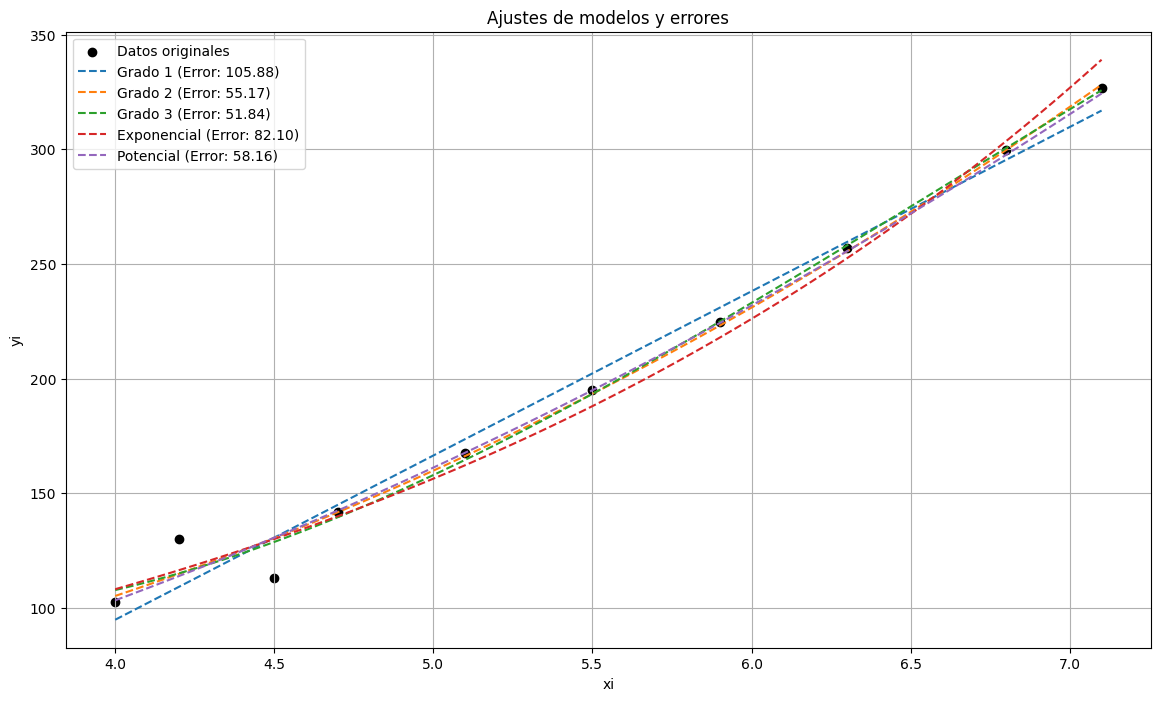

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Datos
xi = np.array([4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1])
yi = np.array([102.56, 130.11, 113.18, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72])

# Ajuste lineal (polinomio de grado 1)
coeffs_1 = np.polyfit(xi, yi, 1)
p1 = np.poly1d(coeffs_1)
y_pred_1 = p1(xi)
error_1 = mean_squared_error(yi, y_pred_1)

# Ajuste cuadrático (polinomio de grado 2)
coeffs_2 = np.polyfit(xi, yi, 2)
p2 = np.poly1d(coeffs_2)
y_pred_2 = p2(xi)
error_2 = mean_squared_error(yi, y_pred_2)

# Ajuste cúbico (polinomio de grado 3)
coeffs_3 = np.polyfit(xi, yi, 3)
p3 = np.poly1d(coeffs_3)
y_pred_3 = p3(xi)
error_3 = mean_squared_error(yi, y_pred_3)

# Ajuste exponencial
log_yi = np.log(yi)
coeffs_exp = np.polyfit(xi, log_yi, 1)
a_exp = coeffs_exp[0]
b_exp = np.exp(coeffs_exp[1])
y_pred_exp = b_exp * np.exp(a_exp * xi)
error_exp = mean_squared_error(yi, y_pred_exp)

# Ajuste potencial
log_xi = np.log(xi)
log_yi = np.log(yi)
coeffs_pot = np.polyfit(log_xi, log_yi, 1)
a_pot = coeffs_pot[0]
b_pot = np.exp(coeffs_pot[1])
y_pred_pot = b_pot * xi**a_pot
error_pot = mean_squared_error(yi, y_pred_pot)

# Funciones ajustadas en formato string
def polinomio_str(coefs):
    terms = [f"{coef:+.2f}x^{i}" if i > 1 else (f"{coef:+.2f}x" if i == 1 else f"{coef:+.2f}") 
             for i, coef in enumerate(coefs[::-1])]
    return " ".join(terms)

# Resultados
resultados = {
    'Grado 1': {'Coeficientes': coeffs_1, 'Error': error_1, 'Fórmula': polinomio_str(coeffs_1)},
    'Grado 2': {'Coeficientes': coeffs_2, 'Error': error_2, 'Fórmula': polinomio_str(coeffs_2)},
    'Grado 3': {'Coeficientes': coeffs_3, 'Error': error_3, 'Fórmula': polinomio_str(coeffs_3)},
    'Exponencial': {'Coeficientes': (a_exp, b_exp), 'Error': error_exp, 'Fórmula': f"{b_exp:.2f}e^({a_exp:.2f}x)"},
    'Potencial': {'Coeficientes': (a_pot, b_pot), 'Error': error_pot, 'Fórmula': f"{b_pot:.2f}x^{a_pot:.2f}"}
}

# Impresión de resultados
for key, value in resultados.items():
    print(f"{key}:")
    print(f"  Coeficientes: {value['Coeficientes']}")
    print(f"  Error (MSE): {value['Error']}")
    print(f"  Fórmula: {value['Fórmula']}")
    print()

# Identificar el modelo más eficiente
mejor_modelo = min(resultados, key=lambda k: resultados[k]['Error'])
print(f"El modelo más eficiente es {mejor_modelo} con un MSE de {resultados[mejor_modelo]['Error']:.4f}")

# Gráficas
plt.figure(figsize=(14, 8))

# Datos originales
plt.scatter(xi, yi, color='black', label='Datos originales')

# Generar puntos x para las líneas ajustadas
x_fit = np.linspace(min(xi), max(xi), 100)

# Grado 1
plt.plot(x_fit, p1(x_fit), label=f'Grado 1 (Error: {error_1:.2f})', linestyle='--')

# Grado 2
plt.plot(x_fit, p2(x_fit), label=f'Grado 2 (Error: {error_2:.2f})', linestyle='--')

# Grado 3
plt.plot(x_fit, p3(x_fit), label=f'Grado 3 (Error: {error_3:.2f})', linestyle='--')

# Exponencial
plt.plot(x_fit, b_exp * np.exp(a_exp * x_fit), label=f'Exponencial (Error: {error_exp:.2f})', linestyle='--')

# Potencial
plt.plot(x_fit, b_pot * x_fit**a_pot, label=f'Potencial (Error: {error_pot:.2f})', linestyle='--')

plt.xlabel('xi')
plt.ylabel('yi')
plt.title('Ajustes de modelos y errores')
plt.legend()
plt.grid(True)
plt.show()


## Codigo en base al modelo de grado 3

Polinomio de grado 3:            3          2
-0.002846 x + 0.2381 x - 6.588 x + 63.48
Error (MSE) de grado 3: 0.31520668193048523


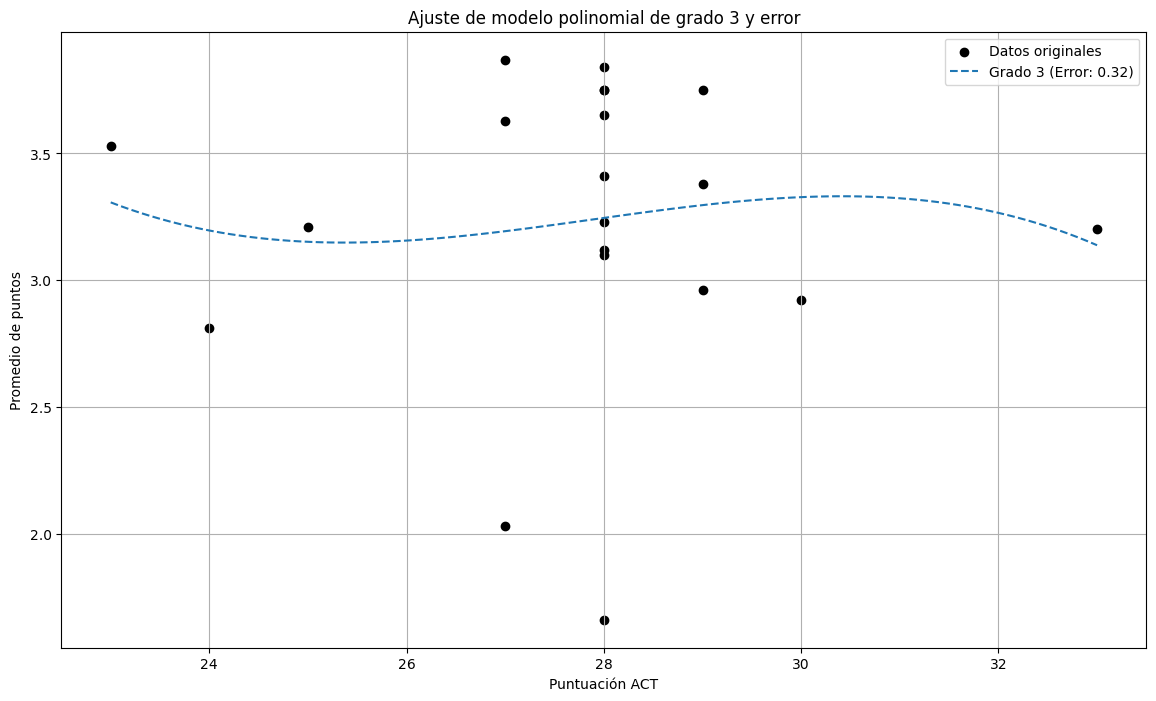

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

act_scores = np.array([28, 25, 28, 27, 28, 33, 28, 29, 23, 27, 29, 28, 27, 28, 28, 28, 29, 30, 28, 24])
average_points = np.array([3.84, 3.21, 3.23, 3.63, 3.75, 3.2, 3.41, 3.38, 3.53, 2.03, 3.75, 3.65, 3.87, 3.75, 1.66, 3.12, 2.96, 2.92, 3.1, 2.81])

# Ajuste polinomial de grado 3
coeffs_3 = np.polyfit(act_scores, average_points, 3)
p3 = np.poly1d(coeffs_3)
y_pred_3 = p3(act_scores)
error_3 = mean_squared_error(average_points, y_pred_3)
print(f"Polinomio de grado 3: {p3}")
print(f"Error (MSE) de grado 3: {error_3}")

plt.figure(figsize=(14, 8))
plt.scatter(act_scores, average_points, color='black', label='Datos originales')
x_fit = np.linspace(min(act_scores), max(act_scores), 100)
plt.plot(x_fit, p3(x_fit), label=f'Grado 3 (Error: {error_3:.2f})', linestyle='--')
plt.xlabel('Puntuación ACT')
plt.ylabel('Promedio de puntos')
plt.title('Ajuste de modelo polinomial de grado 3 y error')
plt.legend()
plt.grid(True)
plt.show()


## Comprobación

Grado 1:
  Coeficientes: [9.55223881e-04 3.21349254e+00]
  Error (MSE): 0.31763617910447767

Grado 2:
  Coeficientes: [-1.61452436e-03  9.01781777e-02  1.98760106e+00]
  Error (MSE): 0.31747948831019207

Grado 3:
  Coeficientes: [-2.84618822e-03  2.38148975e-01 -6.58786338e+00  6.34766075e+01]
  Error (MSE): 0.31520668193048523

Exponencial:
  Coeficientes: [9.26883726e-04 1.13076847e+00]
  Error (MSE): 0.32140333709531543

Potencia:
  Coeficientes: [0.02050674 1.08839751]
  Error (MSE): 0.3213891135631868

El modelo más eficiente es Grado 3 con un MSE de 0.3152


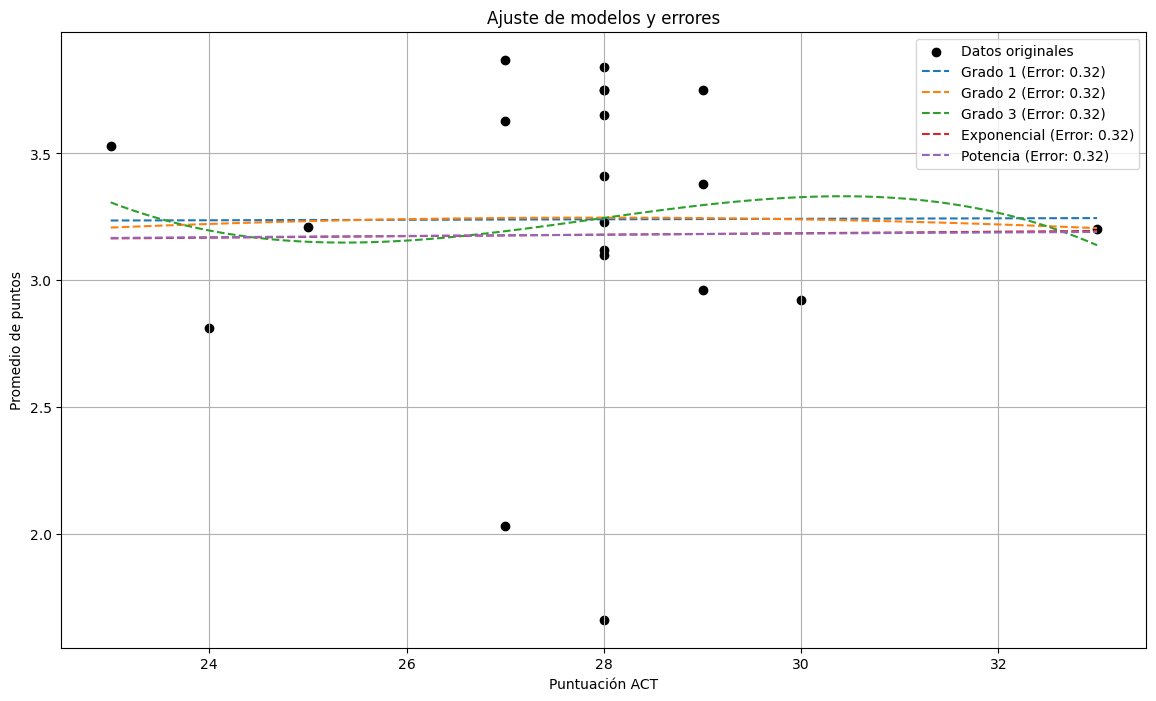

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

act_scores = np.array([28, 25, 28, 27, 28, 33, 28, 29, 23, 27, 29, 28, 27, 28, 28, 28, 29, 30, 28, 24])
average_points = np.array([3.84, 3.21, 3.23, 3.63, 3.75, 3.2, 3.41, 3.38, 3.53, 2.03, 3.75, 3.65, 3.87, 3.75, 1.66, 3.12, 2.96, 2.92, 3.1, 2.81])

# Ajuste lineal (polinomio de grado 1)
coeffs_1 = np.polyfit(act_scores, average_points, 1)
p1 = np.poly1d(coeffs_1)
y_pred_1 = p1(act_scores)
error_1 = mean_squared_error(average_points, y_pred_1)

# Ajuste polinomial de grado 2
coeffs_2 = np.polyfit(act_scores, average_points, 2)
p2 = np.poly1d(coeffs_2)
y_pred_2 = p2(act_scores)
error_2 = mean_squared_error(average_points, y_pred_2)

# Ajuste polinomial de grado 3
coeffs_3 = np.polyfit(act_scores, average_points, 3)
p3 = np.poly1d(coeffs_3)
y_pred_3 = p3(act_scores)
error_3 = mean_squared_error(average_points, y_pred_3)

# Ajuste exponencial (transformación logarítmica)
log_yi = np.log(average_points)
coeffs_exp = np.polyfit(act_scores, log_yi, 1)
a_exp = coeffs_exp[0]
b_exp = np.exp(coeffs_exp[1])
y_pred_exp = b_exp * np.exp(a_exp * act_scores)
error_exp = mean_squared_error(average_points, y_pred_exp)

# Ajuste de potencia (transformación logarítmica)
log_xi = np.log(act_scores)
log_yi = np.log(average_points)
coeffs_pow = np.polyfit(log_xi, log_yi, 1)
a_pow = coeffs_pow[0]
b_pow = np.exp(coeffs_pow[1])
y_pred_pow = b_pow * act_scores ** a_pow
error_pow = mean_squared_error(average_points, y_pred_pow)

resultados = {
    'Grado 1': {'Coeficientes': coeffs_1, 'Error': error_1, 'Modelo': p1},
    'Grado 2': {'Coeficientes': coeffs_2, 'Error': error_2, 'Modelo': p2},
    'Grado 3': {'Coeficientes': coeffs_3, 'Error': error_3, 'Modelo': p3},
    'Exponencial': {'Coeficientes': coeffs_exp, 'Error': error_exp, 'Modelo': lambda x: b_exp * np.exp(a_exp * x)},
    'Potencia': {'Coeficientes': coeffs_pow, 'Error': error_pow, 'Modelo': lambda x: b_pow * x ** a_pow},
}

modelo_mas_eficiente = min(resultados, key=lambda x: resultados[x]['Error'])
mse_mas_bajo = resultados[modelo_mas_eficiente]['Error']
for key, value in resultados.items():
    print(f"{key}:")
    print(f"  Coeficientes: {value['Coeficientes']}")
    print(f"  Error (MSE): {value['Error']}")
    print()

print(f"El modelo más eficiente es {modelo_mas_eficiente} con un MSE de {mse_mas_bajo:.4f}")

plt.figure(figsize=(14, 8))
plt.scatter(act_scores, average_points, color='black', label='Datos originales')
x_fit = np.linspace(min(act_scores), max(act_scores), 100)
for key, value in resultados.items():
    if key in ['Exponencial', 'Potencia']:
        plt.plot(x_fit, value['Modelo'](x_fit), label=f'{key} (Error: {value["Error"]:.2f})', linestyle='--')
    else:
        plt.plot(x_fit, value['Modelo'](x_fit), label=f'{key} (Error: {value["Error"]:.2f})', linestyle='--')

plt.xlabel('Puntuación ACT')
plt.ylabel('Promedio de puntos')
plt.title('Ajuste de modelos y errores')
plt.legend()
plt.grid(True)
plt.show()
